Contoh Soal RANDOM FOREST

In [1]:
import pandas as pd
import numpy as np

# Memasukkan keseluruhan data olahan
data_olahan = {
    'Temperatur': [80, 83, 68, 64, 69, 71, 78, 82, 73, 77],
    'Kelembapan': [90, 78, 80, 65, 70, 80, 75, 92, 88, 70],
    'Kecepatan Angin': [9.82, 4.86, 30.49, 9.02, 2.35, 34.18, 7.46, 7.51, 15.53, 12.68],
    'Jumlah_Pemain': [39, 43, 28, 43, 56, 13, 51, 41, 29, 36]
}
df = pd.DataFrame(data_olahan)

# Menampilkan data olahan dalam bentuk tubular
display(df)

# Melihat informasi dasar dari keseluruhan data olahan
df.info()

,Temperatur,Kelembapan,Kecepatan Angin,Jumlah_Pemain
0,80,90,9.82,39
1,83,78,4.86,43
2,68,80,30.49,28
3,64,65,9.02,43
4,69,70,2.35,56
5,71,80,34.18,13
6,78,75,7.46,51
7,82,92,7.51,41
8,73,88,15.53,29
9,77,70,12.68,36


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Temperatur       10 non-null     int64  
 1   Kelembapan       10 non-null     int64  
 2   Kecepatan Angin  10 non-null     float64
 3   Jumlah_Pemain    10 non-null     int64  
dtypes: float64(1), int64(3)
memory usage: 448.0 bytes


In [2]:
from sklearn.model_selection import train_test_split

# Penetapan variabel input dan variabel output
X, y = df.drop('Jumlah_Pemain', axis=1), df['Jumlah_Pemain']

# Splitting data olahan menjadi data latih dan data uji dengan perbandingan proporsi data 50%:50%
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, shuffle=False)

# Menampilkan seluruh sampel data dari data latih dan data uji, sesuai variabelnya.
display(X_train, y_train)
display(X_test, y_test)

,Temperatur,Kelembapan,Kecepatan Angin
0,80,90,9.82
1,83,78,4.86
2,68,80,30.49
3,64,65,9.02
4,69,70,2.35
5,71,80,34.18


0    39
1    43
2    28
3    43
4    56
5    13
Name: Jumlah_Pemain, dtype: int64

,Temperatur,Kelembapan,Kecepatan Angin
6,78,75,7.46
7,82,92,7.51
8,73,88,15.53
9,77,70,12.68


6    51
7    41
8    29
9    36
Name: Jumlah_Pemain, dtype: int64

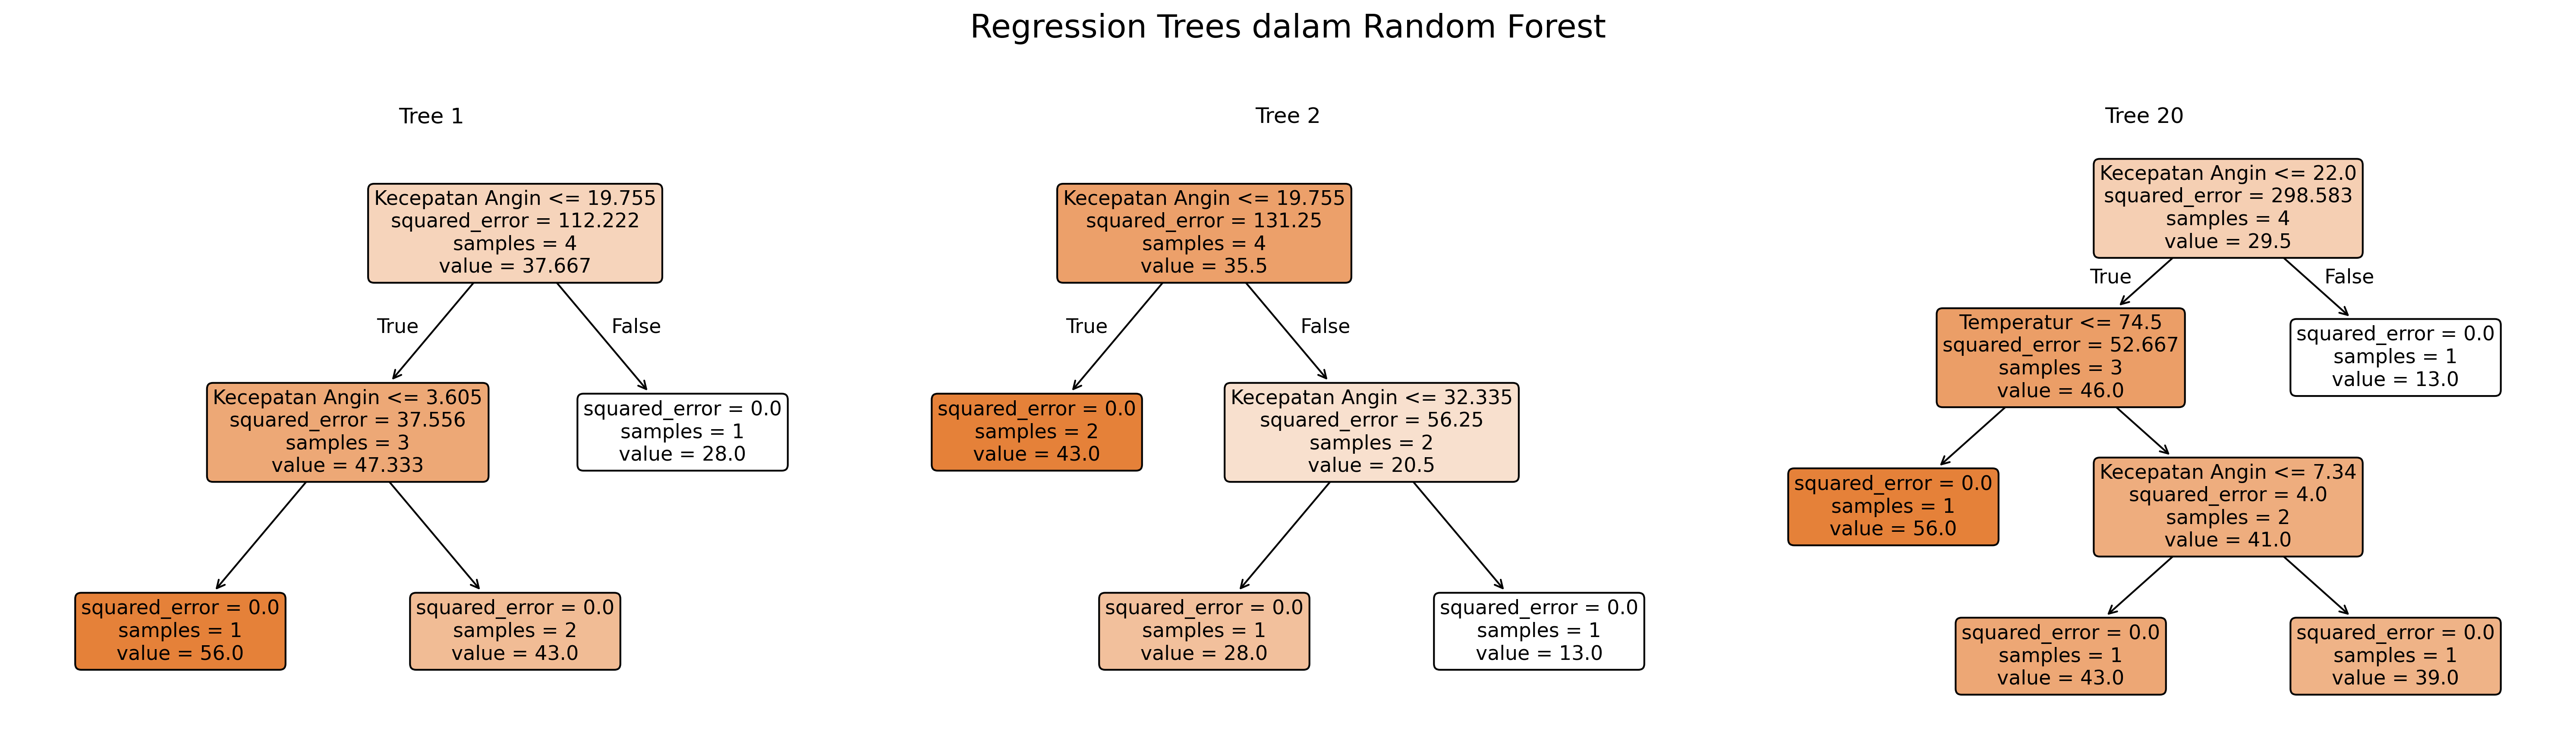

In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Melatih Model Random Forest
RandomForest = RandomForestRegressor(random_state=42, n_estimators=50)
RandomForest.fit(X_train, y_train)

# Visualisasi Beberapa Regression Tree yang terbentuk dalam Random Forest
trees_to_show = [0, 1, 19]
feature_names = X_train.columns.tolist()

fig, axes = plt.subplots(1, 3, figsize=(20, 6), dpi=300)
fig.suptitle('Regression Trees dalam Random Forest', fontsize=18)

for idx, tree_idx in enumerate(trees_to_show):
    plot_tree(RandomForest.estimators_[tree_idx], 
              feature_names=feature_names,
              filled=True,
              rounded=True,
              ax=axes[idx],
              fontsize=11)  # Increased font size
    axes[idx].set_title(f'Tree {tree_idx + 1}', fontsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])


In [4]:
y_pred = RandomForest.predict(X_test)
print(y_pred)

[43.08 37.16 37.14 43.46]


,Prediksi,Aktual
6,43.08,51
7,37.16,41
8,37.14,29
9,43.46,36


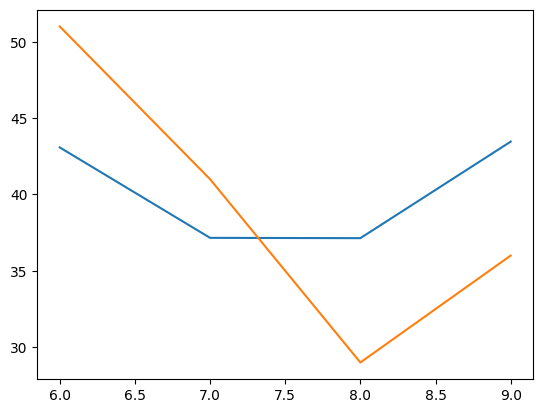

In [5]:
def plot_predictions(RandomForest, X, y):
    predictions = RandomForest.predict(X_test)
    df = pd.DataFrame(data={'Prediksi': predictions, 'Aktual': y})
    plt.plot(df['Prediksi'])
    plt.plot(df['Aktual'])
    return df

plot_predictions(RandomForest, X_test, y_test)

In [6]:
from sklearn.metrics import root_mean_squared_error

# Evaluasi kinerja model dengan metrik RMSE
rmse = root_mean_squared_error(y_test, y_pred)
print(f'RMSE: {rmse:.4f}')

RMSE: 7.0602
